In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

#import os

#### 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
duq = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
duq.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
duq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Видим, что данные у нас числовые, формат float64, который возможно заменить на int, если отсутствуют сотые доли.

Проверим, есть ли числа в наших данных с сотыми долями: 

In [5]:
for i in duq['DUQ_MW']:
    if i.is_integer():
        continue
    else:
        print('no')

Таких данных не обнаружено, поэтому можем отформатировать числа в int:

In [6]:
duq['DUQ_MW'] = duq['DUQ_MW'].astype('int')
duq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   DUQ_MW  119068 non-null  int32
dtypes: int32(1)
memory usage: 1.4 MB


In [7]:
duq.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


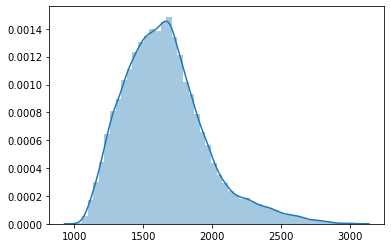

In [8]:
sns.distplot(duq.values)

Видим, что распределение потребения энергии близко к нормальному.

In [9]:
duq['DUQ_MW'].isnull().sum()

0

Видим, что пропущенных значений нет

Text(0, 0.5, 'МВт')

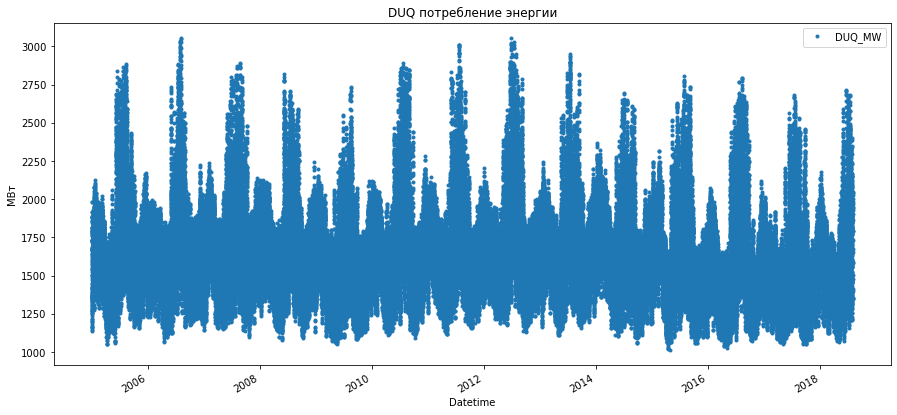

In [10]:
duq.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

На основании полученного графика можем заключить, что в данных есть циклы.
Также видим, что выбросов как таковых не наблюдается. 

In [11]:
import pandas_profiling
pandas_profiling.ProfileReport(duq)

c:\users\root\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### 3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [12]:
brent = pd.read_excel('brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [13]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


In [20]:
brent['Значение'].isnull().sum()

0

Text(0, 0.5, '$')

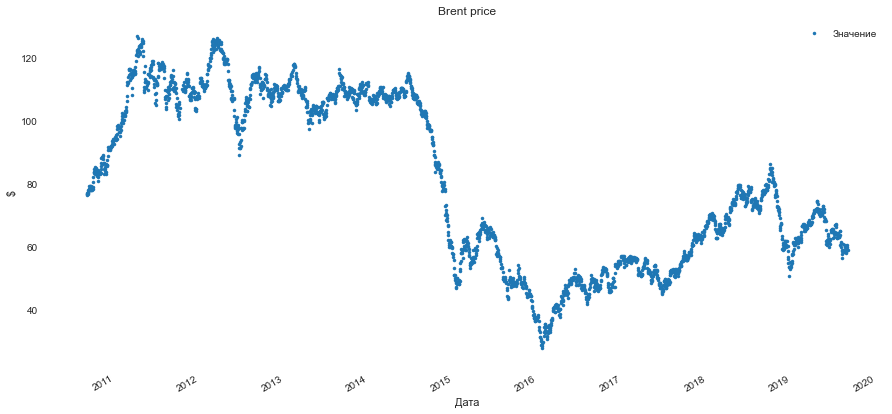

In [35]:
brent.plot( style = '.', figsize = ( 15, 7 ), title = 'Brent price' )
plt.ylabel ( '$' )

In [21]:
mounth_brent = brent.resample("M").mean()
mounth_brent.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


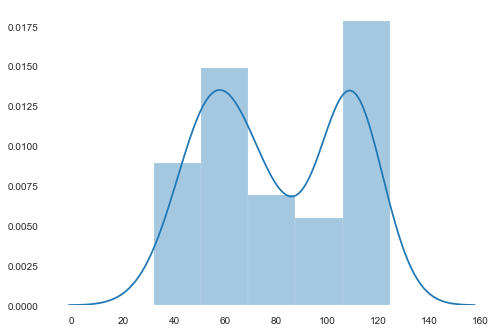

In [22]:
sns.distplot(mounth_brent.values)

Text(0, 0.5, '$')

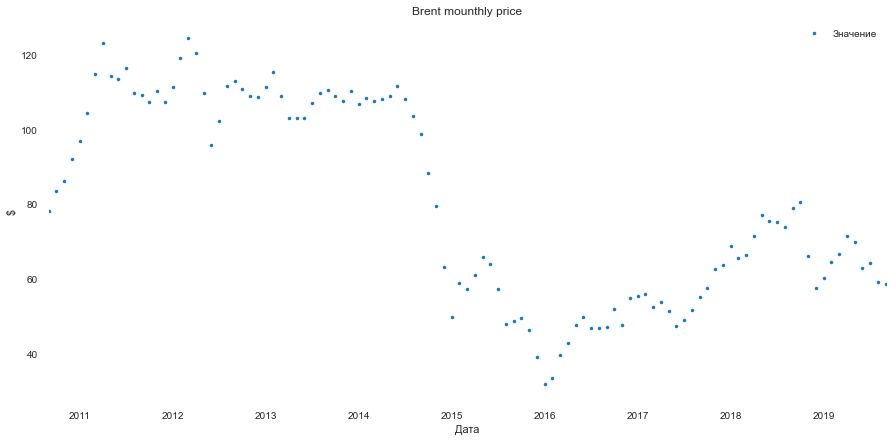

In [32]:
mounth_brent.plot( style = '.', figsize = ( 15, 7 ), title = 'Brent mounthly price' )
plt.ylabel ( '$' )

In [23]:
week_brent = brent.resample("W").mean()
week_brent.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [30]:
week_brent.values

array([[ 76.616     ],
       [ 77.67333333],
       [ 78.69333333],
       [ 78.51833333],
       [ 81.21166667],
       [ 84.14666667],
       [ 83.49833333],
       [ 82.795     ],
       [ 83.36166667],
       [ 87.00333333],
       [ 87.77666667],
       [ 84.76833333],
       [ 85.07333333],
       [ 89.31166667],
       [ 90.954     ],
       [ 91.63666667],
       [ 93.53833333],
       [ 93.96833333],
       [ 94.558     ],
       [ 97.83333333],
       [ 97.44      ],
       [ 97.71333333],
       [101.12166667],
       [101.03666667],
       [103.03666667],
       [110.68666667],
       [115.305     ],
       [114.45      ],
       [112.93166667],
       [115.565     ],
       [116.248     ],
       [123.38333333],
       [122.57      ],
       [123.078     ],
       [124.78833333],
       [116.16666667],
       [113.86833333],
       [111.495     ],
       [113.438     ],
       [115.54833333],
       [117.29833333],
       [115.18833333],
       [109.14333333],
       [110

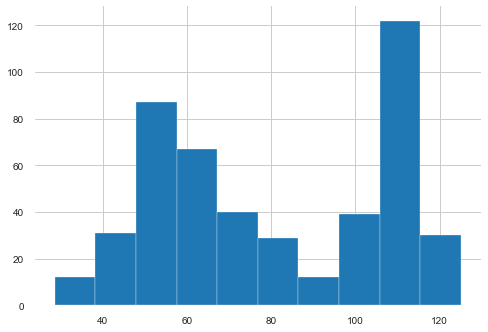

In [34]:
week_brent['Значение'].hist()

Text(0, 0.5, '$')

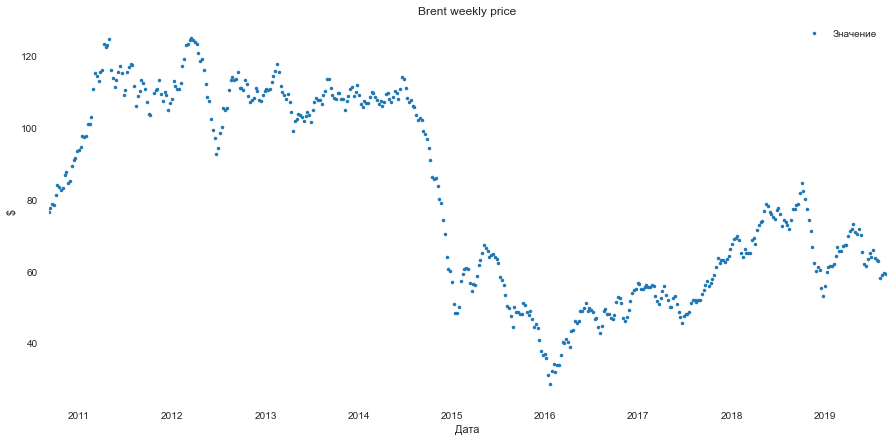

In [33]:
week_brent.plot( style = '.', figsize = ( 15, 7 ), title = 'Brent weekly price' )
plt.ylabel ( '$' )

#### 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [ ]:
plt.figure( figsize=( 15, 7 ))
plt.subplot(3,1,1)

plt.ylabel('Потребление энергии, МВт')
plt.plot(test_b.index,X_test_pred_lb, label='predict lin data' )
plt.plot(test_b.index,y_test_b, label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.grid()
plt.legend()
plt.subplot(3,1,2)

plt.ylabel('Потребление энергии, МВт')
plt.plot(test_b.index,X_test_pred_fb, label='predict RF data' )
plt.plot(test_b.index,y_test_b, label='test data')
plt.grid()
plt.legend()
plt.subplot(3,1,3)
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test_b.index,X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index,y_test_b, label='test data')
plt.grid()
plt.legend()
plt.show()